## Project01

In [175]:
from collections import Counter
from collections import defaultdict
import re
from typing import List
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### 1. texts processing

In [176]:
def tokenize_texts_keep_inner_apostrophes(texts: List[str]) -> List[str]:
    """
    Tokenize texts into word tokens while preserving apostrophes ONLY inside words.

    Keeps:   "it's", "don't", "john's"
    Removes: "'hello'" -> "hello", "'tis" -> "tis", "dogs'" -> "dogs", "'" -> (removed)

    Steps:
      1) Lowercase
      2) Replace non-letter/non-apostrophe with spaces
      3) Extract tokens matching: letters optionally with internal 'letters chunks

    Args:
        texts: list of raw text strings

    Returns:
        flat list of tokens
    """
    all_tokens: List[str] = []

    # Token pattern: letters + ( ' + letters ) repeated
    # This guarantees apostrophes only appear internally, never at the edges.
    token_pattern = re.compile(r"[a-zA-Z]+(?:'[a-zA-Z]+)*")

    for text in texts:
        text = text.lower()

        # Optional: if your texts contain curly apostrophes (’), normalize to straight '
        text = text.replace("’", "'")

        # Replace everything except letters, apostrophes and whitespace with space
        text = re.sub(r"[^a-zA-Z'\s]", " ", text)

        # Find all valid tokens (apostrophes only inside)
        tokens = token_pattern.findall(text)

        all_tokens.extend(tokens)

    return all_tokens


In [177]:
def word_counter(text: list[str]) -> Counter:
    """
    Counts word frequencies across multiple texts.
    and all word counts are accumulated together.
    Returns a Counter object.
    """
    tokens = tokenize_texts_keep_inner_apostrophes(text)
    print(f"Total words: {len(tokens)}")
    return Counter(tokens)



In [178]:
# loading raw texts

with open("raw/book1.txt", "r", encoding="utf-8") as f:
    raw_book1 = f.read()

with open("raw/book2.txt", "r", encoding="utf-8") as f:
    raw_book2 = f.read()

with open("raw/book3.txt", "r", encoding="utf-8") as f:
    raw_book3 = f.read()


In [179]:
text = [raw_book1, raw_book2, raw_book3]
words = word_counter(text)
sorted_words = sorted(words.items(), key=lambda x: x[1], reverse=True)
print(f"Total unique words:{len(sorted_words)}")

Total words: 164776
Total unique words:12201


In [180]:
# printing number of words and 20 most common words

word_number = sum(freq for word, freq in sorted_words)
print("number of words:", word_number)
print()

for key, value in sorted_words[:20]:
    print(key, value)

number of words: 164776

the 13923
of 6633
a 4974
and 4599
to 4234
in 3192
is 2501
it 1647
that 1555
be 1509
with 1316
as 1277
on 1193
at 1098
or 1072
by 1055
for 1004
which 987
are 865
from 845


### 2. showing 100 most common words with their zipf score

In [181]:
def build_zipf_df(sorted_words: list[tuple[str, int]]) -> pd.DataFrame:
    """
    Build a Zipf DataFrame,
    Columns: word, counts, rank, zipf_score (counts * rank).
    """
    # Create rows with rank starting at 1
    rows = []
    for rank, (word, count) in enumerate(sorted_words, start=1):
        zipf_score = count * rank
        rows.append((word, count, rank, zipf_score))

    df = pd.DataFrame(rows, columns=["word", "counts", "rank", "zipf_score"])
    return df



In [192]:
df = build_zipf_df(sorted_words)
pd.set_option('display.max_rows', 100)
df.head(100)

,word,counts,rank,zipf_score
0,the,13923,1,13923
1,of,6633,2,13266
2,a,4974,3,14922
3,and,4599,4,18396
4,to,4234,5,21170
5,in,3192,6,19152
6,is,2501,7,17507
7,it,1647,8,13176
8,that,1555,9,13995
9,be,1509,10,15090


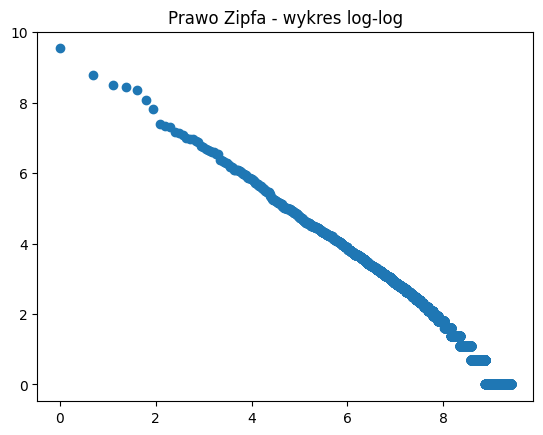

In [193]:
#Plotting a graph to visualize linear rank to count ratio
def plot_scores(df):
  plt.scatter(np.log(df["rank"]), np.log(df["counts"]))
  plt.title("Prawo Zipfa - wykres log-log")
  plt.savefig("images/zipf_loglog.png", dpi=300)
  plt.show()
plot_scores(df)

### 3. showing how many number of words you should know to be able to read specific percent of text

In [194]:
def words_needed_for_coverage(percent, sorted_words):
    if percent < 0 or percent > 1:
        raise ValueError("x should be between 0 and 1!")
    total_needed = sum(freq for word, freq in sorted_words) * percent
    count = 0
    i = 0
    while count < total_needed:
        count += sorted_words[i][1]
        i += 1

    return i

In [195]:
print(f"Number of different words in texts: {len(sorted_words)}")
print()
print("Number of words you should know to be able to read specific percent of text:")
print(f"10%: {words_needed_for_coverage(0.1,sorted_words)}")
print(f"20%: {words_needed_for_coverage(0.2,sorted_words)}")
print(f"30%: {words_needed_for_coverage(0.3,sorted_words)}")
print(f"40%: {words_needed_for_coverage(0.4,sorted_words)}")
print(f"50%: {words_needed_for_coverage(0.5,sorted_words)}")
print(f"60%: {words_needed_for_coverage(0.6,sorted_words)}")
print(f"70%: {words_needed_for_coverage(0.7,sorted_words)}")
print(f"80%: {words_needed_for_coverage(0.8,sorted_words)}")
print(f"90%: {words_needed_for_coverage(0.9,sorted_words)}")

Number of different words in texts: 12201

Number of words you should know to be able to read specific percent of text:
10%: 2
20%: 5
30%: 14
40%: 37
50%: 93
60%: 241
70%: 571
80%: 1314
90%: 3194


### 4. showing adjacent pairs of words

In [196]:

def tokenize_texts(texts: list[str]) -> list[str]:
    """
    Tokenizes texts keeping apostrophes ONLY inside words.
    Removes standalone ' and edge apostrophes.
    """
    all_tokens = []
    token_pattern = re.compile(r"[a-zA-Z]+(?:'[a-zA-Z]+)*")

    for text in texts:
        text = text.lower()
        text = text.replace("’", "'")  # normalize curly apostrophes
        text = re.sub(r"[^a-zA-Z'\s]", " ", text)

        tokens = token_pattern.findall(text)
        all_tokens.extend(tokens)

    return all_tokens


In [187]:
tokens = tokenize_texts([raw_book1, raw_book2, raw_book3])

In [197]:
def get_adjacent_pairs(tokens: list[str]) -> list[tuple[str, str]]:
    """
    Returns all adjacent word pairs from a list of tokens.

    """
    pairs = [(tokens[i], tokens[i + 1]) for i in range(len(tokens) - 1)]
    return pairs



In [198]:
pairs = get_adjacent_pairs(tokens)
pair_counts = Counter(get_adjacent_pairs(tokens))
for key, value in pair_counts.most_common(20):
    print(key, value)

('of', 'the') 1969
('in', 'the') 902
('to', 'the') 756
('of', 'a') 530
('and', 'the') 479
('on', 'the') 468
('at', 'the') 362
('with', 'the') 335
('from', 'the') 328
('in', 'a') 326
('by', 'the') 323
('to', 'be') 283
('it', 'is') 269
('project', 'gutenberg') 264
('that', 'the') 234
('illustration', 'fig') 232
('with', 'a') 214
('for', 'the') 204
('may', 'be') 197
('the', 'other') 195


###5. counting unique neighbors

In [200]:
def neighbor_counts(tokens: list[str]):
    left_neighbors = defaultdict(set)
    right_neighbors = defaultdict(set)

    for i in range(len(tokens) - 1):
        w1, w2 = tokens[i], tokens[i+1]
        right_neighbors[w1].add(w2)
        left_neighbors[w2].add(w1)

    # sum of unique neighbours left+right
    degree = {w: len(left_neighbors[w] | right_neighbors[w])
              for w in set(tokens)}

    return degree, left_neighbors, right_neighbors



In [201]:
degree, leftN, rightN = neighbor_counts(tokens)

# TOP 50 words with the largest amount of unique neighbors = core vocabulary
core = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:50]
for w, d in core:
    print(w, d)

the 4752
and 3550
of 3207
a 2555
to 2178
in 1949
is 1450
or 1097
that 1056
it 1003
with 988
for 924
on 883
as 873
by 866
at 831
which 755
be 733
are 729
his 704
from 650
her 610
he 603
was 585
an 582
but 576
this 558
one 540
its 467
had 465
so 450
when 426
she 399
if 397
has 375
not 373
you 367
into 365
their 362
have 355
will 336
two 326
would 325
i 323
all 316
out 315
we 314
were 314
may 311
they 308
